Used Cars UK

https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/code

Dataset with ca. 100'000 samples.

Price - Prediction with xgboost and deep neural network. mean root square error and mean absolute error.
xgb versus dnn,

# https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
#https://www.researchgate.net/publication/379076507_Revolutionizing_the_used_car_market_Predicting_prices_with_XGBoost
#https://dev.to/siddheshcodemaster/eda-feature-engineering-and-ml-model-creation-100000-uk-used-car-data-set-kaggle-288p

#method to load data from files into data frame. Add additional feature "BrandMedianPrice".

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings
 
warnings.filterwarnings("ignore")

import csv
import os

PROJECT_ROOT_DIR = "."

def getData():

    global cars_glob
 
    
    carFilesDir=  os.path.join(PROJECT_ROOT_DIR, "archive")

    g=os.listdir(carFilesDir)
    
    allframes={f: pd.read_csv(os.path.join(carFilesDir,f), dtype={'model': 'string','year': 'int64', 'tax': 'float64', 'price': 'float64','transmission': 'string','mileage': 'float64'    ,'fuelType': 'string', 'mpg': 'float64'}) for f in os.listdir(carFilesDir)}
      
    allCars=dict()

    for k, v in allframes.items():
        #not including these because column mpg is not there
        if k == "cclass.csv":
            continue
        if k == "focus.csv":
            continue
        #impute values if zero
        v['engineSize'][v['engineSize']<=0]=v['engineSize'].median()
        v_tmp=v
       
        v_tmp['medianBrandPrice']=v_tmp['price'].median()
        
        #v_tmp['gpengSize']=(v_tmp['mileage']/v_tmp['mpg'])/v_tmp['engineSize']
        allCars[k]=v_tmp

    #for k, v in allCars.items():
       # print(v.columns)

    cars = pd.concat(allCars.values())
     
    # Extract text features
    cats = cars.select_dtypes(exclude=np.number).columns.tolist()

    # Convert to Pandas category
    for col in cats:
        cars[col] = cars[col].astype('category')
    cars_glob=cars
    return cars


Load the data into frame. Print some statistics and a correlation matrix.

In [2]:
cars = getData()
cars['logprice']=np.log(cars['price'])
print(cars.head())
print("shape: " ,  cars.shape, "\n")

print("describe:", cars.describe(include='all'), "\n",  sep="\n")

cars_num=cars[['year', 'price', 'mileage','tax','mpg', 'engineSize', 'medianBrandPrice']]

print("Pearson's Correlations :", cars_num.corr(), "\n", sep="\n")


  model  year    price transmission  mileage fuelType    tax   mpg  \
0    A1  2017  12500.0       Manual  15735.0   Petrol  150.0  55.4   
1    A6  2016  16500.0    Automatic  36203.0   Diesel   20.0  64.2   
2    A1  2016  11000.0       Manual  29946.0   Petrol   30.0  55.4   
3    A4  2017  16800.0    Automatic  25952.0   Diesel  145.0  67.3   
4    A3  2019  17300.0       Manual   1998.0   Petrol  145.0  49.6   

   engineSize  medianBrandPrice  
0         1.4           20200.0  
1         2.0           20200.0  
2         1.4           20200.0  
3         2.0           20200.0  
4         1.0           20200.0  
shape:  (99187, 10) 

describe:
          model          year          price transmission        mileage  \
count     99187  99187.000000   99187.000000        99187   99187.000000   
unique      195           NaN            NaN            4            NaN   
top      Fiesta           NaN            NaN       Manual            NaN   
freq       6557           NaN          

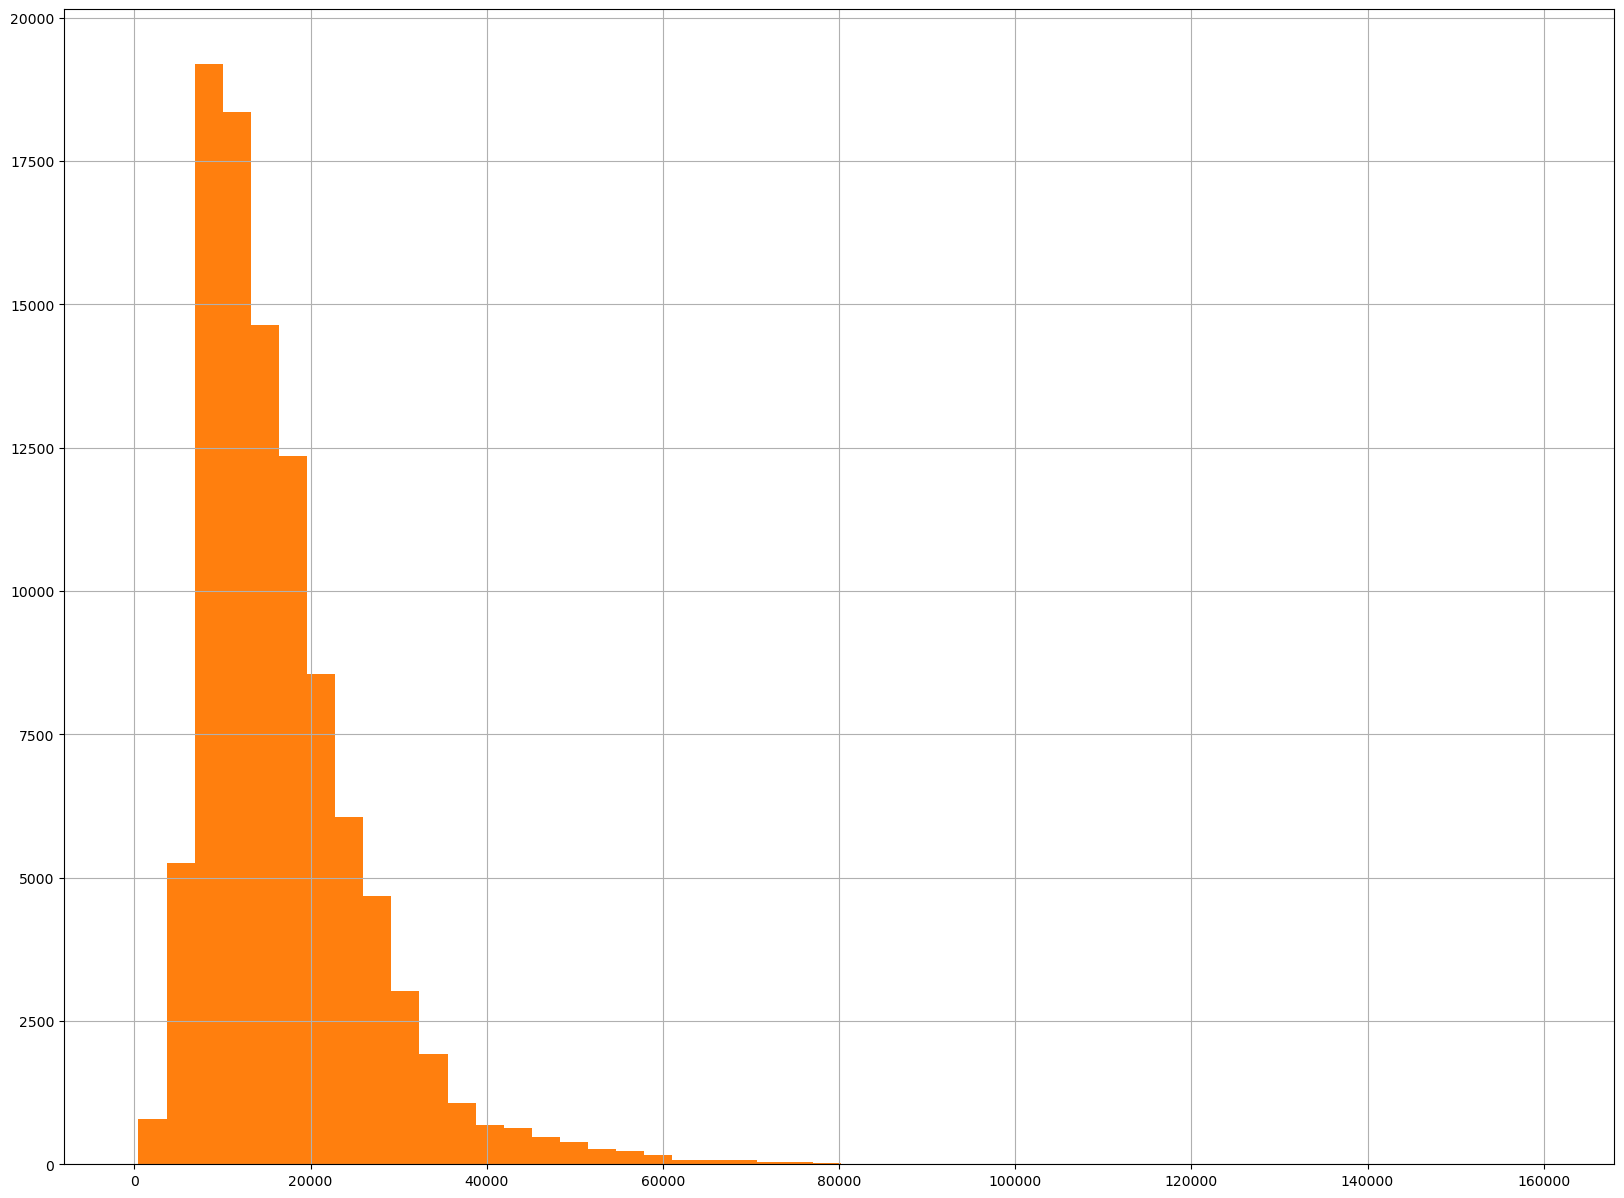

<Axes: >

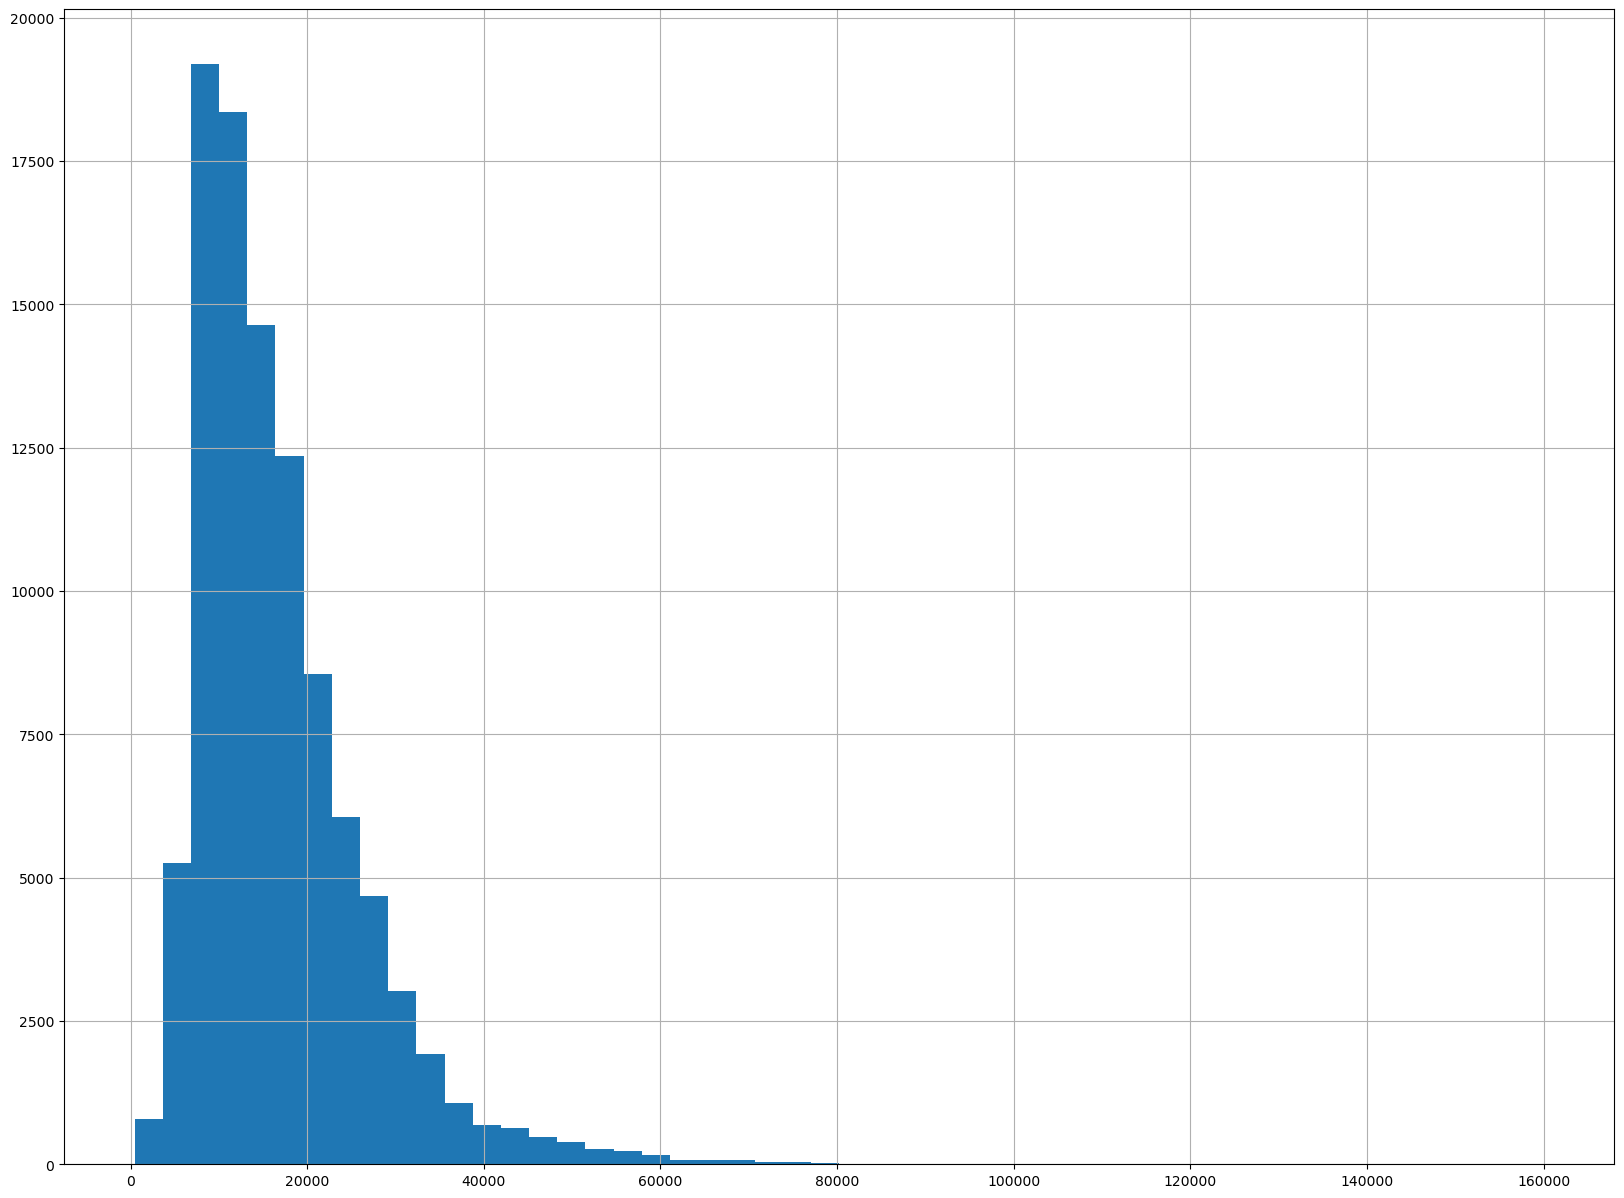

In [10]:
cars['logprice']=np.log(cars['price'])
cars.head()
cars['logprice'].hist(bins=50, figsize=(20,15))
cars['origprice']=np.exp(cars['logprice'])
cars['origprice'].hist(bins=50, figsize=(20,15))
plt.show()
cars['price'].hist(bins=50, figsize=(20,15))

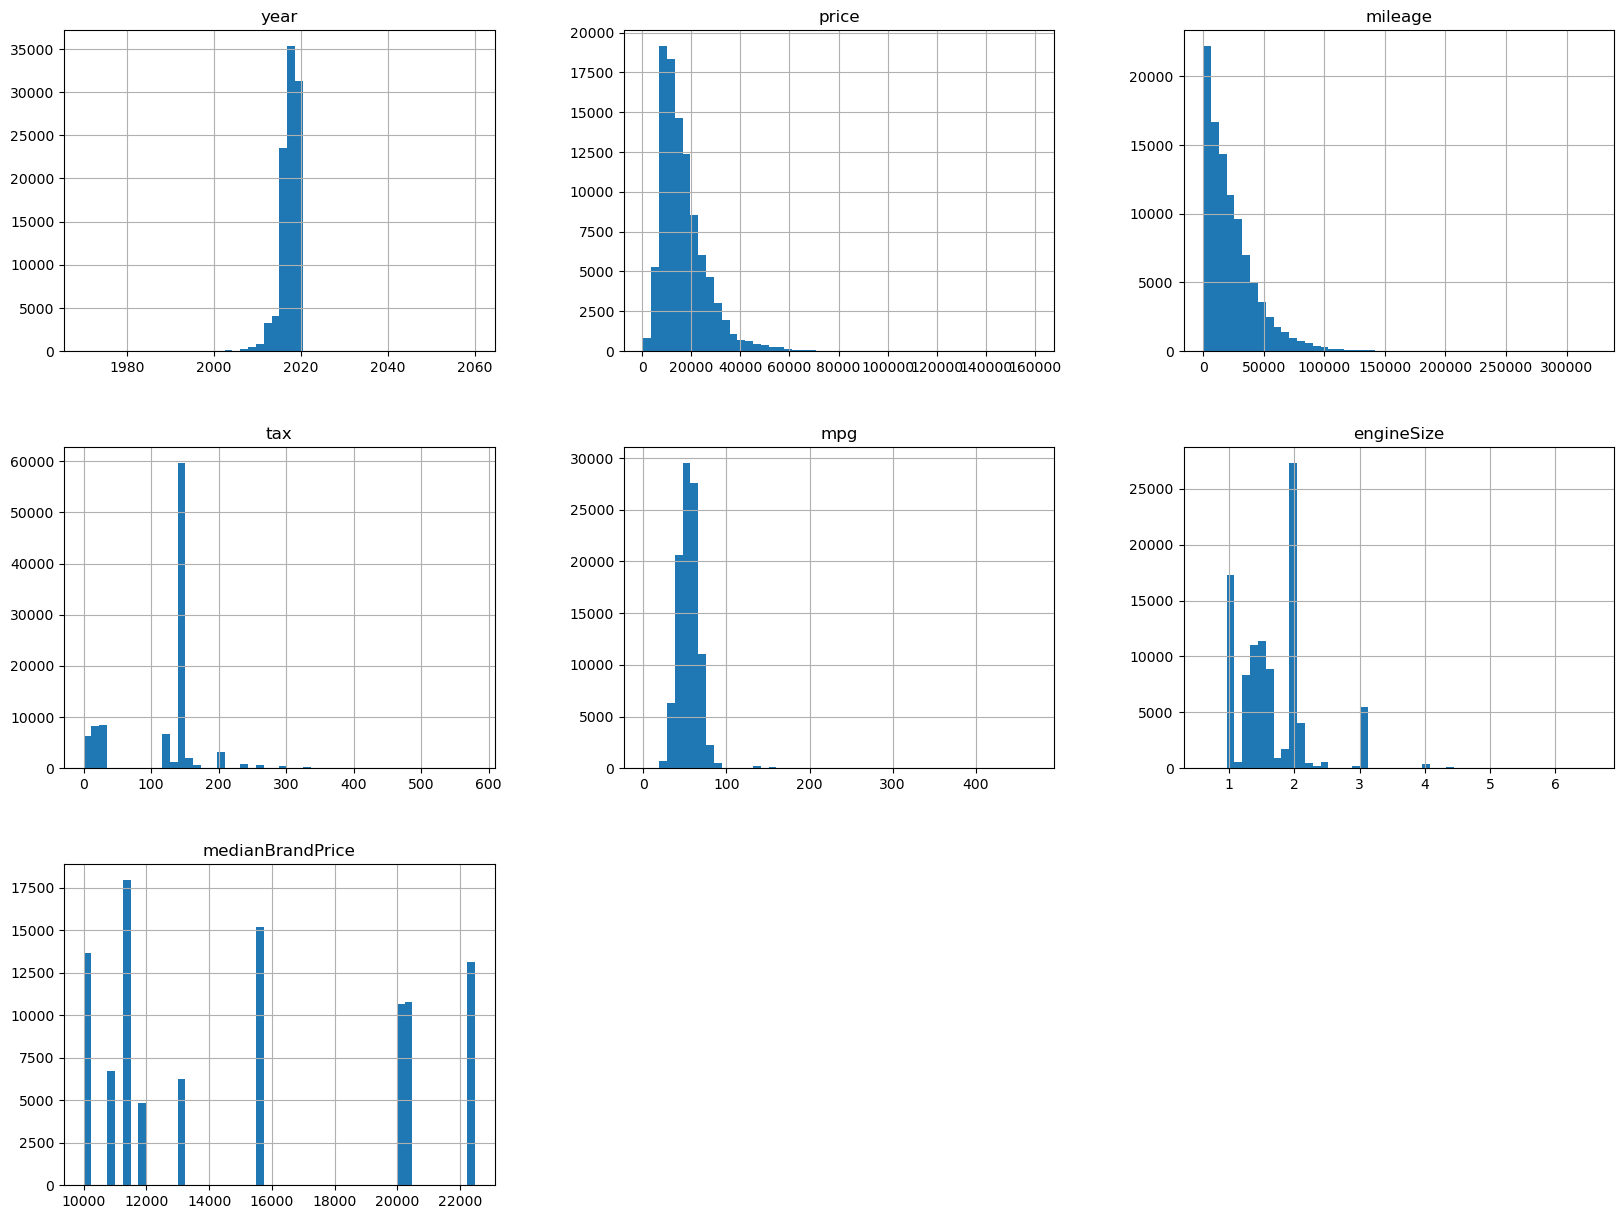

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
cars.hist(bins=50, figsize=(20,15))
#save_fig("cars_attribute_histogram_plots")
plt.show()

scatter plot.
Linearity?

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='price', ylabel='year'>,
        <Axes: xlabel='mileage', ylabel='year'>,
        <Axes: xlabel='tax', ylabel='year'>,
        <Axes: xlabel='mpg', ylabel='year'>,
        <Axes: xlabel='engineSize', ylabel='year'>,
        <Axes: xlabel='medianBrandPrice', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='mileage', ylabel='price'>,
        <Axes: xlabel='tax', ylabel='price'>,
        <Axes: xlabel='mpg', ylabel='price'>,
        <Axes: xlabel='engineSize', ylabel='price'>,
        <Axes: xlabel='medianBrandPrice', ylabel='price'>],
       [<Axes: xlabel='year', ylabel='mileage'>,
        <Axes: xlabel='price', ylabel='mileage'>,
        <Axes: xlabel='mileage', ylabel='mileage'>,
        <Axes: xlabel='tax', ylabel='mileage'>,
        <Axes: xlabel='mpg', ylabel='mileage'>,
        <Axes: xlabel='engineSize', ylabel='mileage'>,
     

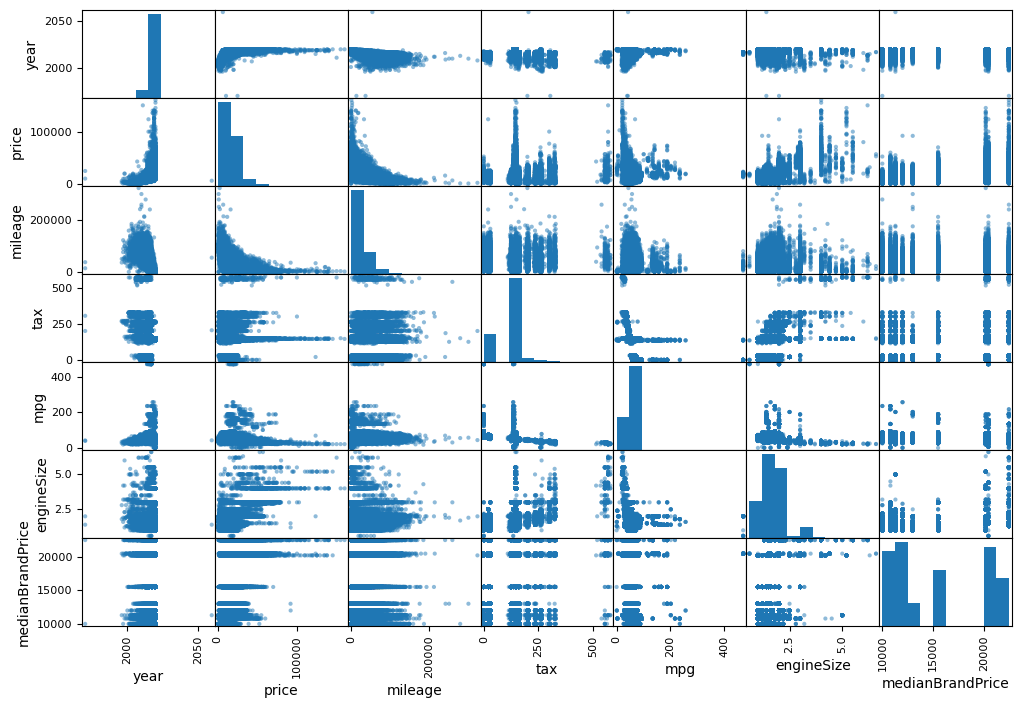

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(cars, figsize=(12, 8))
#save_fig("cars_scatter_matrix_plot")

Prepare the data for training. Split into train and test sets

In [13]:
#cars = getData()
import xgboost as xgb
 
from sklearn.model_selection import train_test_split


X, y = cars.drop('price', axis=1), cars[['price']]
ylogprice=np

indexes=np.arange(0,len(X),1)

# Split the data: 80%/20%
X_train, X_test, y_train, y_test, indexes_train, indexes_test = train_test_split(X, y, indexes, random_state=1, test_size=0.2)

#X_train2, X_test2 = X_train.drop('medianBrandPrice', axis=1),  X_test.drop('medianBrandPrice', axis=1), 

print("X shape:", X.shape)
print("\n")
print("X_train shape:", X_train.shape)
print("\n")
print("X_test shape:", X_test.shape)

#print(X_train2.shape)
#print(X_test2.shape)

#create xgb Matrixes
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

#dtrain_reg2 = xgb.DMatrix(X_train2, y_train, enable_categorical=True)
#dtest_reg2 = xgb.DMatrix(X_test2, y_test, enable_categorical=True)

#cars.describe(include='all')

X shape: (99187, 9)


X_train shape: (79349, 9)


X_test shape: (19838, 9)


#helper methods for xgb

In [14]:
# https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
#https://www.researchgate.net/publication/379076507_Revolutionizing_the_used_car_market_Predicting_prices_with_XGBoost

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

import xgboost as xgb

from sklearn.model_selection import ParameterGrid

from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

import csv
import os

PROJECT_ROOT_DIR = "."


def trainXGBmodel(dtrain_reg, dtest_reg, lossfun, params, num_boost_round):
    evals = [(dtrain_reg, "train"), (dtest_reg, "test")]
    evals_result = {}

    paramsBase = {"objective": "reg:" + lossfun, "tree_method": "hist"}
    allParams=  {**paramsBase, **params}
        
    model = xgb.train( params=allParams, dtrain=dtrain_reg, num_boost_round=num_boost_round, evals=evals, evals_result=evals_result, verbose_eval=200)

    losskey=None
    if lossfun=="squarederror":
        losskey="rmse"
    if lossfun=="absoluteerror":
        losskey="mae"
    
    evals_frame=pd.DataFrame({'train_'+losskey: evals_result['train'][losskey], 'test_'+losskey: evals_result['test'][losskey]})

    #config=model.save_config()
    #print(config)  
    #print(xgb.__version__)

    #attr=model.attributes()
    #print(attr)

    return model, evals_frame


#https://www.datacamp.com/tutorial/xgboost-in-python
#tuning
#https://randomrealizations.com/posts/xgboost-parameter-tuning-with-optuna/
#https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
#xgboost parameters: https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
 

def do_xgbCVDefaultparams(dtrain_reg, num_boost_round=4, early_stopping_rounds=10, thres = 0.1):
    
    emptyGrid=[{}]
    return do_xgbCVparamTuning(emptyGrid, dtrain_reg, num_boost_round,    early_stopping_rounds, thres,  saveResults=False)

#randomized search for the optimal paramters using a parameter grid
# returns optimal parameters together with the corresponding train history, mean-loss value on test-folds and boost-rounds


def do_xgbCVparamTuning(paramDict, n_params, early_stopping_rounds, dtrain_reg, lossfun, num_boost_round, stratified=False, saveResults=False):
    
    #storing data of the optimal parameters
    optim_params=None
    optim_rounds=None
    optim_loss_valid=np.inf
    optim_eval_hist=None

    if lossfun=='squarederror':
        loss_valid='test-rmse-mean'
    if lossfun=='absoluteerror':
        loss_valid='test-mae-mean'
        
    #randomly select n_params parameter combinations
    allGridsearch_params= ParameterGrid(paramDict)
    allParamsCount=len(allGridsearch_params)
    param_indexes=np.random.randint( 0, allParamsCount, n_params)
    
    paramsBase = {"objective": "reg:" + lossfun, "tree_method": "hist" }
    
    i=0

    for par_idx in param_indexes:
        gridParams=allGridsearch_params[par_idx]
        i=i+1
        print("gridParam Nr: "+ str(i) + "/" + str(n_params))
        params = {**paramsBase, **gridParams}
        
        eval_hist = xgb.cv(params=params,  dtrain=dtrain_reg, stratified=stratified, num_boost_round=num_boost_round, nfold=5,early_stopping_rounds=early_stopping_rounds, 
                         verbose_eval=200 
        )


        loss_valid_current=eval_hist[loss_valid].min()
        boost_rounds=eval_hist[loss_valid].argmin()

        print("\loss {} for {} rounds".format(loss_valid_current, boost_rounds))
        if loss_valid_current < optim_loss_valid:
            optim_rounds=boost_rounds
            optim_loss_valid = loss_valid_current
            optim_params = gridParams
            optim_eval_hist=eval_hist
            print("optimal values so far:")
            print(optim_loss_valid)
            print(optim_rounds)
            
            if saveResults:
                np.save('eval_hist.npy', eval_hist)
                optimValuesList={'optim_loss_valid': optim_loss_valid, 'optim_params': optim_params, 'optim_rounds': optim_rounds}
                np.save('optimValuesList.npy', optimValuesList)
                print("saved")
                 
    return  optim_eval_hist, optim_params, optim_loss_valid, optim_rounds



Hyperparameter tuning for xgboost using  crossvalidation and randomized grid search.

In [15]:
# import numpy as np
from datetime import datetime

 
#default paramters!!!!
#max_depth in [6] 
#gamma in [0]
#reg_lambda in [1] 
#colsample_bytree in [1] 
#min_child_weight in [1] 
#learning_rate in [0.3]
         

n_hyperparams=6
gridSearchParamsDict ={
                  'learning_rate': [0.3, 0.5], #0.1, 0.3
                   'subsample':  [0.6, 0.8], 
                  'max_depth' : [5,7,9,12], 
                   #'min_split_loss':  np.random.uniform(0,30^2,n_hyperparams), #gamma
                  'reg_lambda': np.random.uniform(0, 10,n_hyperparams),  #L2 regularization term on weights
                  'colsample_bytree': np.random.uniform(0.5, 1, n_hyperparams),
                  'min_child_weight': np.random.randint( 10, 20, n_hyperparams),
} 

#absolute error: 
{'subsample': 0.6, 'reg_lambda': 4.278721330678163, 'min_child_weight': 18, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 1.9481487825714634, 'colsample_bytree': 0.904965426450073}
#1130.278850389171
#997

n_bstround=400
n_parameterCombis=30

optim_eval_hist={}
optim_params={}
optim_loss_valid={}
optim_rounds={}

print("Parameter tuning for absoluteerror loss:\n")
start = datetime.now()
print(start)
optim_eval_hist["mae"], optim_params["mae"], optim_loss_valid["mae"], optim_rounds["mae"] =  do_xgbCVparamTuning(paramDict=gridSearchParamsDict, n_params=n_parameterCombis,early_stopping_rounds=None, dtrain_reg= dtrain_reg, lossfun='absoluteerror', num_boost_round=n_bstround, stratified=False, saveResults=False)
end = datetime.now()
print(end)
timeused=end-start
print("time minutes:" +str(timeused.total_seconds()/60) + "\n")

print("Parameter tuning for squarederror loss:\n")
start = datetime.now()
print(start)
optim_eval_hist["rmse"], optim_params["rmse"], optim_loss_valid["rmse"], optim_rounds["rmse"] =  do_xgbCVparamTuning(paramDict=gridSearchParamsDict, n_params=n_parameterCombis,early_stopping_rounds=None, dtrain_reg= dtrain_reg, lossfun='squarederror', num_boost_round=n_bstround, stratified=False, saveResults=False)
end = datetime.now()
print(end)
timeused=end-start
print("time minutes:" +str(timeused.total_seconds()/60) + "\n")

print("\n")
print("-----------------------------")
print("optimal parameters absoluteerror:")
print(optim_params["mae"], optim_loss_valid["mae"], optim_rounds["mae"], sep='\n')
print("\n")

print("optimal parameters squarederror:")
print(optim_params["rmse"], optim_loss_valid["rmse"], optim_rounds["rmse"], sep='\n')
 

Parameter tuning for absoluteerror loss:

2024-09-16 11:41:53.740525
gridParam Nr: 1/30
[0]	train-mae:5230.78794+15.66493	test-mae:5235.82375+45.41837
[200]	train-mae:884.52007+2.92793	test-mae:1117.49404+21.66569
[399]	train-mae:808.00273+5.17045	test-mae:1103.84503+21.61358
\loss 1103.8450266883951 for 399 rounds
optimal values so far:
1103.8450266883951
399
gridParam Nr: 2/30
[0]	train-mae:5186.33989+16.18324	test-mae:5195.55511+48.42119
[200]	train-mae:850.26080+3.84607	test-mae:1120.75594+13.85468
[399]	train-mae:777.40660+3.97737	test-mae:1110.72423+15.81894
\loss 1110.715871990516 for 398 rounds
gridParam Nr: 3/30
[0]	train-mae:5420.40490+14.67590	test-mae:5424.02901+41.39186
[200]	train-mae:1044.39563+3.90266	test-mae:1182.32416+14.86903
[399]	train-mae:963.54851+4.60221	test-mae:1148.76000+14.63316
\loss 1148.7599979852916 for 399 rounds
gridParam Nr: 4/30
[0]	train-mae:5303.56890+20.27175	test-mae:5305.72463+65.36314
[200]	train-mae:1142.20757+5.74409	test-mae:1235.76566+11.1

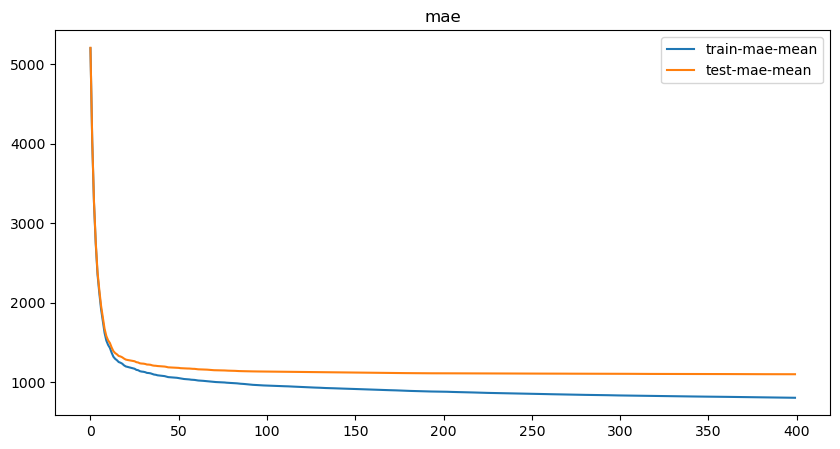

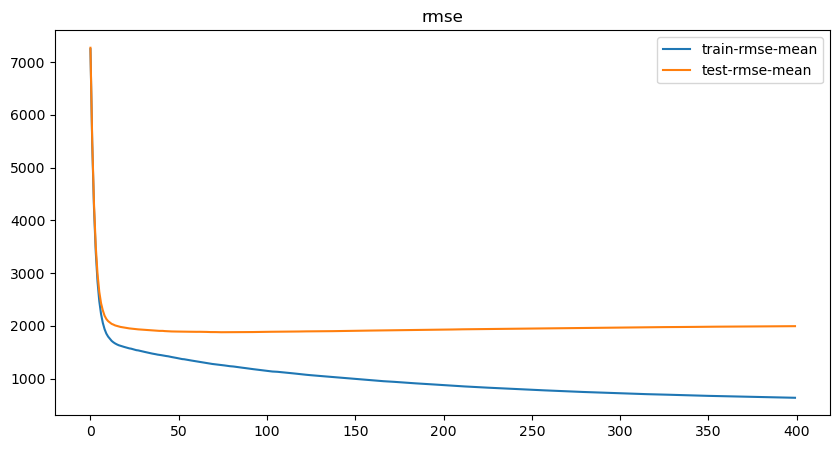

In [16]:
import matplotlib.pyplot as plt

optim_eval_hist_mae=optim_eval_hist["mae"][['train-mae-mean', 'test-mae-mean']]
optim_eval_hist_mae.plot(figsize=(10, 5), title="mae")
plt.show()

optim_eval_hist_rmse=optim_eval_hist["rmse"][['train-rmse-mean', 'test-rmse-mean']]
optim_eval_hist_rmse.plot(figsize=(10, 5), title="rmse")
plt.show()
 

Train the model on the full train set with the previous found optimal parameters. At the same time evalute the model on the test set.

In [17]:
print("train final model 'absoluteerror' with all training data")
finalmodel_mae, final_eval_hist_mae =trainXGBmodel(dtrain_reg=dtrain_reg, dtest_reg=dtest_reg, lossfun="absoluteerror", params=optim_params["mae"], num_boost_round=optim_rounds["mae"])

print("train final model 'squarederror' with all training data")
finalmodel_rmse, final_eval_hist_rmse=trainXGBmodel(dtrain_reg=dtrain_reg, dtest_reg=dtest_reg, lossfun="squarederror", params=optim_params["rmse"], num_boost_round=optim_rounds["rmse"])
#   


train final model 'absoluteerror' with all training data
[0]	train-mae:5205.57599	test-mae:5244.99768
[200]	train-mae:891.63463	test-mae:1075.88097
[398]	train-mae:820.52747	test-mae:1061.47047
train final model 'squarederror' with all training data
[0]	train-rmse:7203.91639	test-rmse:7385.46413
[73]	train-rmse:1262.40050	test-rmse:1698.68365


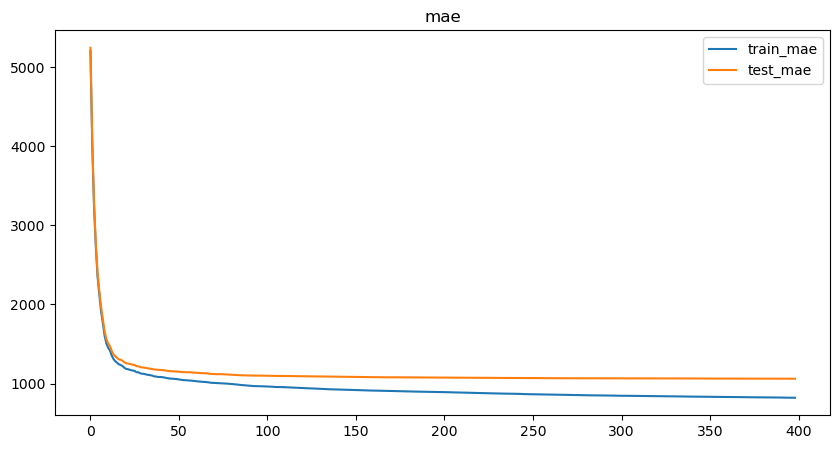

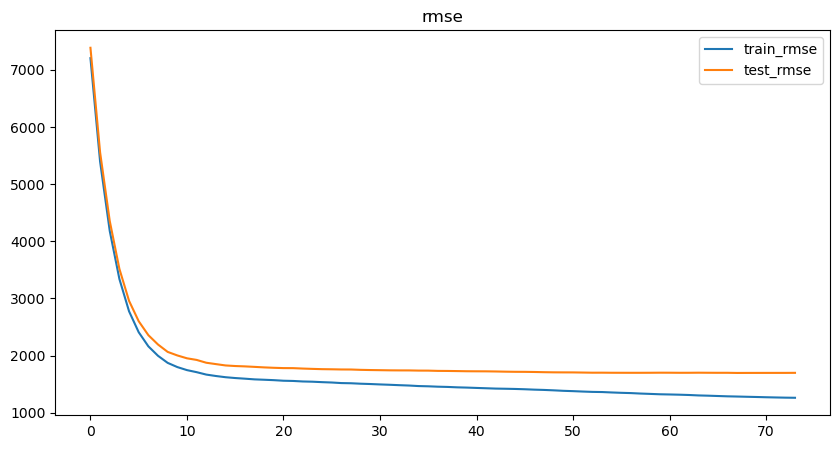

In [18]:
final_eval_hist_mae.plot(figsize=(10, 5), title="mae")
plt.show()

final_eval_hist_rmse.plot(figsize=(10, 5), title="rmse")
plt.show()


In [19]:
#https://www.kaggle.com/code/najibmozahem/used-cars-neural-network/notebook

#https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594

import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from datetime import datetime

def build_DNN_and_compile_model(lossfun):
  #np.random.seed(42)
  #tf.random.set_seed(42)
  model = keras.Sequential([
        #relu
    #  layers.Dense(1024, activation='relu'),  
      layers.Dense(512, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      #layers.Dense(32, activation='relu'), #
      layers.Dense(16, activation='relu'), #
      layers.Dense(8, activation='relu'), #
      layers.Dense(1)
  ])

  model.compile(loss=lossfun, #'mean_absolute_error', # mean_squared_error
                #optimizer=tf.keras.optimizers.Adam(0.01)) #0.001
                optimizer=tf.keras.optimizers.Adagrad(0.04)) #0.001
  
  return model

dnn_model_squaredError=build_DNN_and_compile_model(lossfun="mean_squared_error")
dnn_model_absoluteError=build_DNN_and_compile_model(lossfun="mean_absolute_error")

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

num_attribs = [ "year" ,"mileage", "mpg", "tax", "engineSize", "medianBrandPrice"]
cat_attribs = ["model" ,"fuelType", "transmission", ]

full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attribs),
        ("num", num_pipeline, num_attribs),
    ])

#print(full_pipeline.transformers)

# transform the train data:
X_transf = full_pipeline.fit_transform(X)
X_train_transf=X_transf[indexes_train]
X_test_transf=X_transf[indexes_test]

# transform the train data:
#X_train_transf = full_pipeline.fit_transform(X_train)
X_trainArray= X_train_transf.toarray()

# transform the test data:
#X_test_transf = full_pipeline.fit_transform(X_test)
X_testArray= X_test_transf.toarray()


#split the train data in train and validiation sets: 75&/25%
X_trainArray2, X_validArray2, y_train2, y_valid2 = train_test_split(X_trainArray, y_train, random_state=1)

print("shapes")
print(X_trainArray.shape)
print(X_trainArray2.shape)
print(y_train2.shape)
print(X_validArray2.shape)
print(y_valid2.shape)

print("\n")



shapes
(79349, 210)
(59511, 210)
(59511, 1)
(19838, 210)
(19838, 1)




Train and plot the "absolute error" model:

Train 'absolute error' model:
2024-09-16 12:47:08.965880
Epoch 1/300
1860/1860 [==============================] - 7s 3ms/step - loss: 2039.7932 - val_loss: 1445.3193
Epoch 2/300
1860/1860 [==============================] - 6s 3ms/step - loss: 1403.8698 - val_loss: 1447.2505
Epoch 3/300
1860/1860 [==============================] - 6s 3ms/step - loss: 1340.0819 - val_loss: 1322.1653
Epoch 4/300
1860/1860 [==============================] - 7s 4ms/step - loss: 1304.7214 - val_loss: 1312.7988
Epoch 5/300
1860/1860 [==============================] - 7s 4ms/step - loss: 1277.1927 - val_loss: 1298.9014
Epoch 6/300
1860/1860 [==============================] - 8s 4ms/step - loss: 1257.7118 - val_loss: 1276.5537
Epoch 7/300
1860/1860 [==============================] - 7s 4ms/step - loss: 1242.7457 - val_loss: 1270.8185
Epoch 8/300
1860/1860 [==============================] - 8s 4ms/step - loss: 1230.4114 - val_loss: 1270.3380
Epoch 9/300
1860/1860 [==============================] - 7s 4ms/step - 

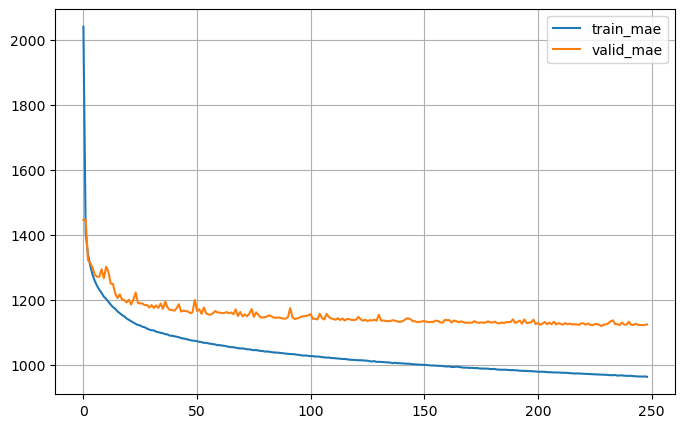

In [20]:
#early stopping pitfall:
#https://pub.aimind.so/never-use-restore-best-weights-true-with-earlystopping-754ba5f9b0c6
early_stopping_patience=20
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=early_stopping_patience, restore_best_weights = True)

n_epochs = 300
print("Train 'absolute error' model:")
start = datetime.now()
print(start)
result_absoluteError=dnn_model_absoluteError.fit(X_trainArray2, y_train2, epochs=n_epochs, validation_data=(X_validArray2, y_valid2), callbacks=[es])
end = datetime.now()
print(end)
timeused=end-start
print("time minutes:" +str(timeused.total_seconds()/60) + "\n")


print(" \nhistory")
trainhist_mae = result_absoluteError.history
trainhist_mae['train-mae']=trainhist_mae['loss']
trainhist_mae['valid-mae']=trainhist_mae['val_loss']

trainhistFrame_mae = pd.DataFrame({'train_mae': trainhist_mae['train-mae'], 'valid_mae': trainhist_mae['valid-mae']})
  
trainhistFrame_mae.plot(figsize=(8, 5))
plt.grid(True) 
plt.show() 

Train and plot the "squared error" model:

Train 'squared error' model:
2024-09-16 15:10:15.082869
Epoch 1/300
1860/1860 [==============================] - 6s 3ms/step - loss: 11477126.0000 - val_loss: 7996931.5000
Epoch 2/300
1860/1860 [==============================] - 6s 3ms/step - loss: 7645270.5000 - val_loss: 6766038.0000
Epoch 3/300
1860/1860 [==============================] - 6s 3ms/step - loss: 6979528.5000 - val_loss: 6091012.0000
Epoch 4/300
1860/1860 [==============================] - 8s 4ms/step - loss: 6569599.0000 - val_loss: 5880775.5000
Epoch 5/300
1860/1860 [==============================] - 7s 4ms/step - loss: 6234989.5000 - val_loss: 5818878.5000
Epoch 6/300
1860/1860 [==============================] - 8s 4ms/step - loss: 6012945.5000 - val_loss: 5472861.0000
Epoch 7/300
1860/1860 [==============================] - 7s 4ms/step - loss: 5834589.5000 - val_loss: 5194371.0000
Epoch 8/300
1860/1860 [==============================] - 8s 4ms/step - loss: 5719537.5000 - val_loss: 5044338.0000
Epoch 9/300
1860/1860 [

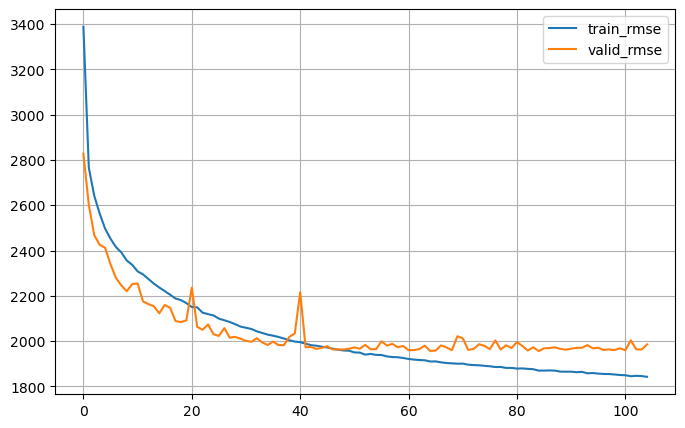

In [21]:
print("Train 'squared error' model:")
start = datetime.now()
print(start)
result_squaredError=dnn_model_squaredError.fit(X_trainArray2, y_train2, epochs=n_epochs, validation_data=(X_validArray2, y_valid2), callbacks=[es])
end = datetime.now()
print(end)
timeused=end-start
print("time minutes:" +str(timeused.total_seconds()/60) + "\n")

print(" \nhistory")
trainhist_rmse = result_squaredError.history
trainhist_rmse['train-rmse']=np.sqrt(trainhist_rmse['loss']).tolist()
trainhist_rmse['valid-rmse']=np.sqrt(trainhist_rmse['val_loss']).tolist()

trainhistFrame_rmse = pd.DataFrame({'train_rmse': trainhist_rmse['train-rmse'], 'valid_rmse': trainhist_rmse['valid-rmse']})
  
trainhistFrame_rmse.plot(figsize=(8, 5))
plt.grid(True) 
plt.show()        

mean absolute error
xgboost mean absolute error on test set:1061.0
DNN mean absolute error on test set:1112.0


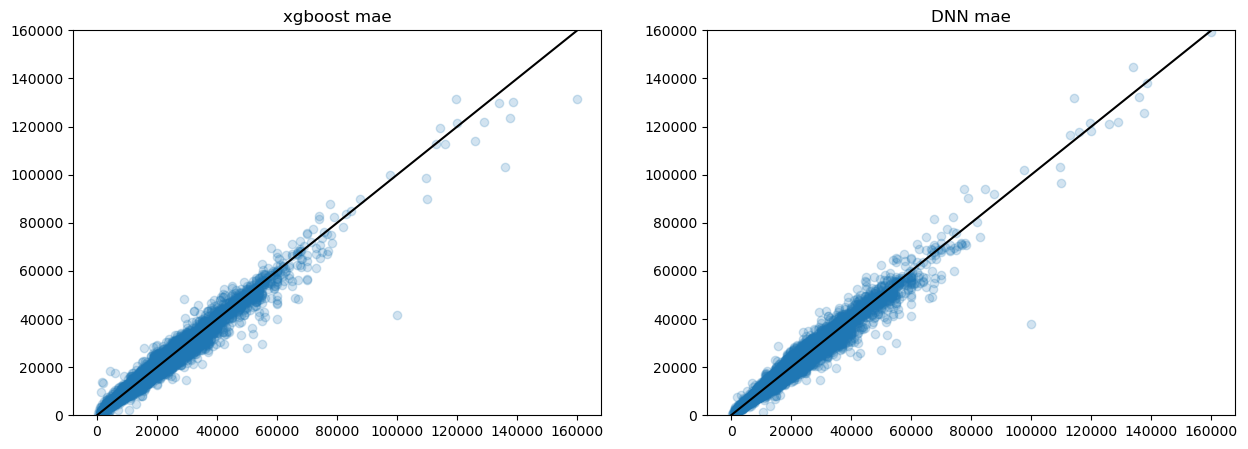



root mean squared error
xgboost root mean squared error on test set:1699.0
xgboost mean absolute error on test set:1075.0
DNN root mean squared error on test set:1904.0
DNN mean absolute error on test set:1195.0


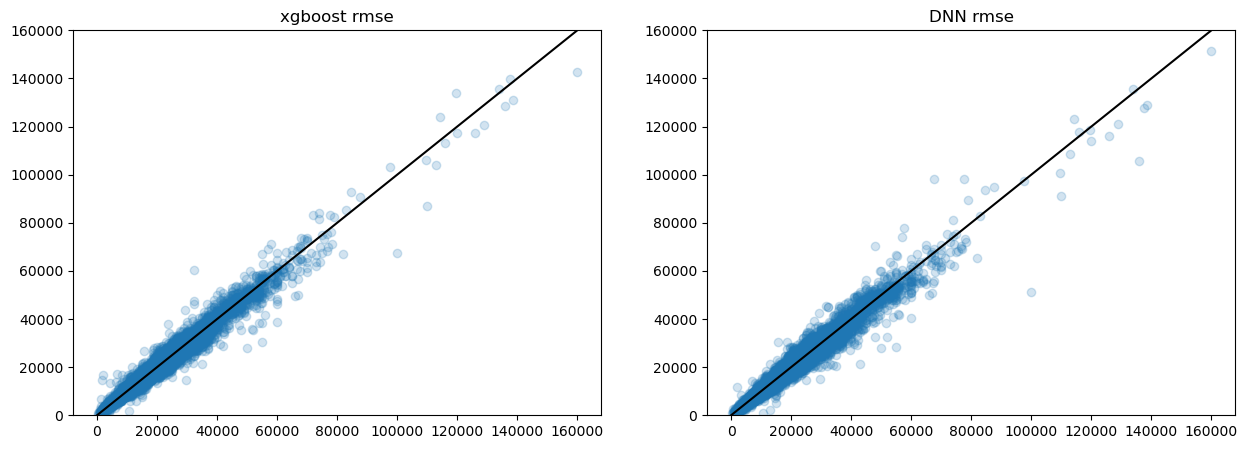

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import root_mean_squared_error


print("mean absolute error")
#xgboost mae
pred_xgb_mae_test=finalmodel_mae.predict(dtest_reg)
xgb_mae_test = np.round(mean_absolute_error(pred_xgb_mae_test, y_test))
print("xgboost mean absolute error on test set:" + str(xgb_mae_test))

#DNN mae
dnn_mae_test=np.round(dnn_model_absoluteError.evaluate(X_testArray, y_test, verbose=0))
print("DNN mean absolute error on test set:" + str(dnn_mae_test))
pred_dnn_mae_test=dnn_model_absoluteError.predict(X_testArray, verbose=0)


plt.subplots(1, 2,   figsize=(15, 5))
plt.subplot(1, 2, 1 )
plt.scatter(y_test, pred_xgb_mae_test, alpha=0.2)
plt.title("xgboost mae")
ax = plt.gca()
ax.axline([0, 0], [1, 1], color="black")
plt.ylim(0, 160000)

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_dnn_mae_test, alpha=0.2)
plt.title("DNN mae")
ax = plt.gca()
ax.axline([0, 0], [1, 1], color="black")
plt.ylim(0, 160000)
plt.show()

print("\n")
#xgboost rmse
print("root mean squared error")
pred_xgb_rmse_test=finalmodel_rmse.predict(dtest_reg)
xgb_rmse_test = np.round(np.sqrt(mean_squared_error(pred_xgb_rmse_test, y_test)))
print("xgboost root mean squared error on test set:" + str(xgb_rmse_test))

xgb_rmse_test_mae = np.round(mean_absolute_error(pred_xgb_rmse_test, y_test))
print("xgboost mean absolute error on test set:" + str(xgb_rmse_test_mae))

#DNN rmse
pred_dnn_rmse_test=dnn_model_squaredError.predict( X_testArray, verbose=0)
dnn_rmse_test=np.round(np.sqrt(dnn_model_squaredError.evaluate(X_testArray, y_test, verbose=0)))
print("DNN root mean squared error on test set:" + str(dnn_rmse_test))

dnn_rmse_test_mae = np.round(mean_absolute_error(pred_dnn_rmse_test, y_test))
print("DNN mean absolute error on test set:" + str(dnn_rmse_test_mae))


#dnn_rmse_test2 = np.sqrt(mean_squared_error(pred_dnn_rmse_test, y_test))
#print(dnn_rmse_test, dnn_rmse_test2)

plt.subplots(1, 2,   figsize=(15, 5))

plt.subplot(1, 2, 1 )
plt.scatter(y_test, pred_xgb_rmse_test, alpha=0.2)
plt.title("xgboost rmse")
ax = plt.gca()
ax.axline([0, 0], [1, 1], color="black")
plt.ylim(0, 160000)

plt.subplot(1, 2, 2 )
plt.scatter(y_test, pred_dnn_rmse_test, alpha=0.2)
plt.title("DNN rmse")
ax = plt.gca()
ax.axline([0, 0], [1, 1], color="black")
plt.ylim(0, 160000)
plt.show()

